In [15]:
import numpy as np
import pandas as pd
import re as re

from settings.constants import TRAIN_CSV, VAL_CSV

train = pd.read_csv(TRAIN_CSV, header = 0, dtype={'Age': np.float64})
val  = pd.read_csv(VAL_CSV , header = 0, dtype={'Age': np.float64})
full_data = [train, val]

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
2,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
3,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
4,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


In [2]:
print(train.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [3]:
from utils.dataloader import DataLoader

df = DataLoader()

df.fit(train)

proceed_data = df.load_data()

proceed_data

D:\Personal\programing\DRU\Projects\Final-Project\API_House_regression\utils\dataloader.py:100: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column] < lower_limit, column] = lower_limit


,MSSubClass,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,GarageType_Detchd,GarageType_No Garage,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,20,-0.212896,1,3,3,0,0,5,6.0,-0.455469,...,False,False,False,False,False,False,False,False,False,True
1,60,-0.265245,1,0,3,0,0,6,7.0,0.718609,...,False,False,False,False,False,False,False,False,False,True
2,30,-0.177841,1,3,3,0,0,5,7.0,-1.988293,...,False,True,False,False,False,False,False,False,False,True
3,50,-0.324474,1,3,3,0,0,5,7.0,-1.107734,...,True,False,False,False,False,False,False,False,False,True
4,50,-0.529035,1,3,3,0,0,5,6.0,-1.531707,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,-0.127631,1,0,3,0,0,6,5.0,1.142582,...,False,False,False,False,False,False,False,False,False,True
1164,50,-0.268313,1,3,3,0,0,4,3.5,-1.401254,...,True,False,False,False,False,False,False,False,False,True
1165,20,-0.234096,1,3,3,0,0,5,7.0,-0.520696,...,True,False,False,False,False,False,False,False,False,True
1166,50,-0.283376,1,3,3,0,0,7,7.5,-1.727387,...,True,False,False,False,False,False,False,False,False,True


In [4]:
print(proceed_data.columns.tolist())


['MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleCondition', 'SalePrice', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Ne

In [5]:
from utils.dataloader import DataLoader

X_raw = train.drop("SalePrice", axis=1)

loader = DataLoader()
loader.fit(X_raw)
X = loader.load_data()
y = train["SalePrice"]

D:\Personal\programing\DRU\Projects\Final-Project\API_House_regression\utils\dataloader.py:100: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column] < lower_limit, column] = lower_limit


C:\Users\rkush\AppData\Local\Temp\ipykernel_2104\1455979044.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  log = pd.concat([log, log_entry], ignore_index=True)


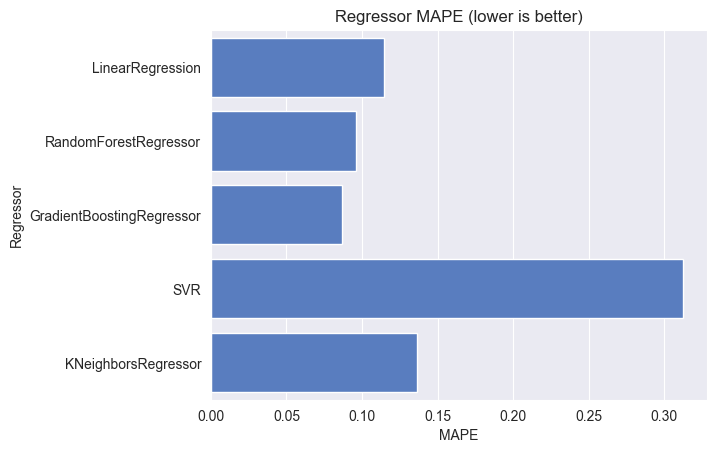

,Regressor,MAPE
0,LinearRegression,0.114594
1,RandomForestRegressor,0.096101
2,GradientBoostingRegressor,0.087039
3,SVR,0.312697
4,KNeighborsRegressor,0.136668


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_percentage_error

regressors = [
    LinearRegression(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor()
]

log_cols = ["Regressor", "MAPE"]
log = pd.DataFrame(columns=log_cols)

sss = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

mape_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for reg in regressors:
        name = reg.__class__.__name__
        reg.fit(X_train, y_train)
        predictions = reg.predict(X_test)
        mape = mean_absolute_percentage_error(y_test, predictions)

        if name in mape_dict:
            mape_dict[name] += mape
        else:
            mape_dict[name] = mape

for reg in mape_dict:
    mape_dict[reg] = mape_dict[reg] / 10.0
    log_entry = pd.DataFrame([[reg, mape_dict[reg]]], columns = log_cols)
    log = pd.concat([log, log_entry], ignore_index=True)

plt.xlabel('MAPE')
plt.title('Regressor MAPE (lower is better)')

sns.set_color_codes("muted")
sns.barplot(x = 'MAPE', y = 'Regressor', data = log, color = "b")
plt.show()

log

In [17]:
import pickle
import json
import pandas as pd

from utils.dataloader import DataLoader
from settings.constants import TRAIN_CSV

from sklearn.ensemble import GradientBoostingRegressor

# 1. Завантаження специфікацій
with open('settings/specifications.json') as f:
    specifications = json.load(f)

# 2. Завантаження датафрейму
raw_train = pd.read_csv(TRAIN_CSV)

# 3. Отримання колонок
x_columns = specifications['description']['X']
y_column = specifications['description']['y']

# 4. Розділення на X і y
X_raw = raw_train[x_columns]
y = raw_train[y_column]

# 5. Обробка через DataLoader
loader = DataLoader()
loader.fit(X_raw)
X = loader.load_data()

# 6. Побудова та тренування моделі
model = GradientBoostingRegressor()
model.fit(X, y)

# 7. Збереження моделі
with open('models/GradientBoosting.pickle', 'wb') as f:
    pickle.dump(model, f)


D:\Personal\programing\DRU\Projects\Final-Project\API_House_regression\utils\dataloader.py:100: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column] < lower_limit, column] = lower_limit
